## 2017-1학기 전략경영 hedonic pricing model                
  
### 경영학과 김태한

중고차 데이터(출처 : https://www.kaggle.com/orgesleka/used-cars-database )

Over 370,000 used cars were scraped from Ebay-Kleinanzeigen. The content of the data is in German. The data is available [here](https://www.kaggle.com/orgesleka/used-cars-database) The fields included in the file data/autos.csv are:

- seller : private or dealer
- offerType
- vehicleType
- yearOfRegistration : at which year the car was first registered
- gearbox
- powerPS : power of the car in PS
- model
- kilometer : how many kilometers the car has driven
- monthOfRegistration : at which month the car was first registered
- fuelType
- brand
- notRepairedDamage : if the car has a damage which is not repaired yet
- price : the price on the ad to sell the car. 

**Goal**  
Given the characteristics/features of the car, the sale price of the car is to be predicted. 

In [1]:
#필요 모듈 불러오기
import pandas as pd
import statsmodels.api as sm
import math
import numpy as np
#Convert text to numeric using Label Encoding
from sklearn import preprocessing

In [2]:
#데이터 읽기
#불러오기 전에 엑셀 필터링 기능 활용해서 어느정도 가공 (ex 등록년도 1000~1800, 2017~5000 행 제거 등등...)
cars = pd.read_csv('autos_refined.csv', encoding='ISO-8859-1')

In [3]:
cars.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-11 22:57,Suche_Bmw_E_30_Cabrio_mit_T?_im_Tausch_gg.Chev...,privat,Angebot,6000,control,cabrio,1980,NaN,0,3er,5000,1,andere,bmw,NaN,2016-03-11 0:00,0,59755,2016-03-16 3:17
1,2016-03-14 0:47,Springt_nicht_mehr_an,privat,Angebot,50,control,kleinwagen,1980,manuell,55,clio,150000,1,benzin,renault,ja,2016-03-13 0:00,0,78234,2016-03-15 21:17
2,2016-04-03 10:06,Suzuki_LJ_80_Kaosse_Karosserie_Oldtimer_Trial_...,privat,Angebot,300,test,suv,1980,NaN,39,andere,5000,1,benzin,suzuki,NaN,2016-04-03 0:00,0,57080,2016-04-03 11:26
3,2016-03-15 14:52,Jeep_CJ,privat,Angebot,750,control,suv,1980,manuell,136,andere,150000,1,benzin,jeep,ja,2016-03-15 0:00,0,31675,2016-03-15 14:52
4,2016-04-05 11:50,Checker_Cab_US_Taxi,privat,Angebot,800,test,limousine,1980,NaN,0,NaN,5000,1,benzin,sonstige_autos,NaN,2016-04-05 0:00,0,71134,2016-04-05 11:50


## 전처리

In [4]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,2.880440e+05,288044.000000,288044.000000,288044.000000,288044.000000,288044.0,288044.000000
mean,1.576514e+04,2003.434586,123.571986,125183.270611,6.396943,0.0,51540.037793
std,4.019761e+06,5.758897,163.820229,39207.298296,3.351938,0.0,25727.227148
min,1.000000e+01,1980.000000,0.000000,5000.000000,1.000000,0.0,1067.000000
25%,1.500000e+03,1999.000000,75.000000,100000.000000,4.000000,0.0,31162.000000
50%,3.600000e+03,2004.000000,114.000000,150000.000000,6.000000,0.0,50766.000000
75%,8.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,72379.000000
max,2.147484e+09,2016.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [5]:
# 변수명 불러오기
cars.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [6]:
#각 변수 타입보기
cars.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

In [7]:
#결측값 찾기
#각 변수 별 결측값 수
cars.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType                0
yearOfRegistration         0
gearbox                 5935
powerPS                    0
model                   7819
kilometer                  0
monthOfRegistration        0
fuelType                   0
brand                      0
notRepairedDamage      34109
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [8]:
#각 변수별 결측값 비율
cars.isnull().sum()/cars.shape[0] * 100

dateCrawled             0.000000
name                    0.000000
seller                  0.000000
offerType               0.000000
price                   0.000000
abtest                  0.000000
vehicleType             0.000000
yearOfRegistration      0.000000
gearbox                 2.060449
powerPS                 0.000000
model                   2.714516
kilometer               0.000000
monthOfRegistration     0.000000
fuelType                0.000000
brand                   0.000000
notRepairedDamage      11.841594
dateCreated             0.000000
nrOfPictures            0.000000
postalCode              0.000000
lastSeen                0.000000
dtype: float64

In [9]:
#결측값 변수 제거
cars_updated = cars.dropna()

In [10]:
cars.shape, cars_updated.shape

((288044, 20), (244336, 20))

In [11]:
#결측값 체크
cars_updated.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

In [12]:
#업데이트된 테이블 조회
cars_updated.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
1,2016-03-14 0:47,Springt_nicht_mehr_an,privat,Angebot,50,control,kleinwagen,1980,manuell,55,clio,150000,1,benzin,renault,ja,2016-03-13 0:00,0,78234,2016-03-15 21:17
3,2016-03-15 14:52,Jeep_CJ,privat,Angebot,750,control,suv,1980,manuell,136,andere,150000,1,benzin,jeep,ja,2016-03-15 0:00,0,31675,2016-03-15 14:52
5,2016-03-24 20:38,Volkswagen_Kaefer,privat,Angebot,1000,test,kleinwagen,1980,manuell,0,kaefer,5000,1,benzin,volkswagen,nein,2016-03-24 0:00,0,4564,2016-04-05 13:16
7,2016-03-17 12:56,Opel_Monza_2.5_Coup?170_PS_Automatik,privat,Angebot,1100,test,coupe,1980,automatik,170,andere,150000,1,benzin,opel,nein,2016-03-17 0:00,0,29221,2016-04-06 17:15
9,2016-03-25 15:55,Renault_R_4_GTL,privat,Angebot,1250,test,kleinwagen,1980,manuell,34,andere,150000,1,benzin,renault,nein,2016-03-25 0:00,0,61449,2016-04-07 10:45


In [13]:
cars_updated.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [14]:
#사용할 변수들 선택
cars_updated = cars_updated.iloc[:, [2,3,6,7,8,9,10,11,12,13,14,15,4]]

In [15]:
#데이터 인코딩
cars_encoded = cars_updated.apply(preprocessing.LabelEncoder().fit_transform)

In [16]:
#인코딩된 데이터 확인
cars_encoded.head()

,seller,offerType,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price
1,1,0,4,0,1,53,62,12,0,1,27,0,14
3,1,0,7,0,1,134,26,12,0,1,14,0,298
5,1,0,4,0,1,0,118,0,0,1,37,1,398
7,1,0,3,0,0,168,26,12,0,1,24,1,423
9,1,0,4,0,1,32,26,12,0,1,27,1,473


In [17]:
cars_encoded.columns

Index(['seller', 'offerType', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType',
       'brand', 'notRepairedDamage', 'price'],
      dtype='object')

In [18]:
#탐색적 자료분석
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
# plt.rcParams['figure.figsize'] = (10, 6)

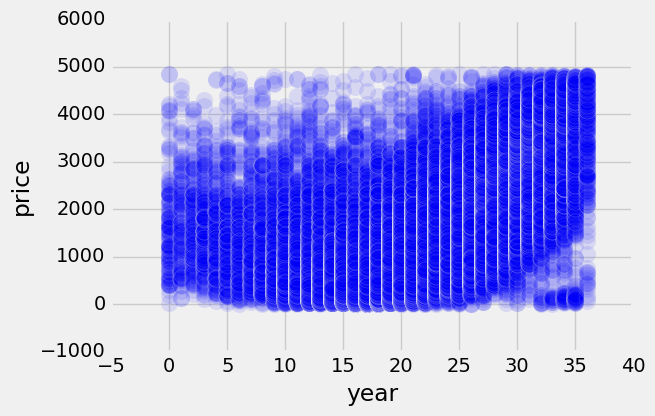

In [19]:
#year, price 산점도
plt.scatter(cars_encoded.yearOfRegistration, 
           cars_encoded.price,
           s=150, alpha = 0.1)
plt.xlabel('year')
plt.ylabel('price')

### 번외 label encoder 작동 확인

>>> le = preprocessing.LabelEncoder()
>>> le.fit(["paris", "paris", "tokyo", "amsterdam"])
LabelEncoder()
>>> list(le.classes_)
['amsterdam', 'paris', 'tokyo']
>>> le.transform(["tokyo", "tokyo", "paris"])
array([2, 2, 1])
>>> list(le.inverse_transform([2, 2, 1]))
['tokyo', 'tokyo', 'paris']

In [20]:
le_brand = preprocessing.LabelEncoder()

In [21]:
le_brand.fit(cars_updated['brand'])

LabelEncoder()

In [22]:
list(le_brand.classes_)

['alfa_romeo',
 'audi',
 'bmw',
 'chevrolet',
 'chrysler',
 'citroen',
 'dacia',
 'daewoo',
 'daihatsu',
 'fiat',
 'ford',
 'honda',
 'hyundai',
 'jaguar',
 'jeep',
 'kia',
 'lada',
 'lancia',
 'land_rover',
 'mazda',
 'mercedes_benz',
 'mini',
 'mitsubishi',
 'nissan',
 'opel',
 'peugeot',
 'porsche',
 'renault',
 'rover',
 'saab',
 'seat',
 'skoda',
 'smart',
 'subaru',
 'suzuki',
 'toyota',
 'trabant',
 'volkswagen',
 'volvo']

In [23]:
cars_encoded['brand']

1         27
3         14
5         37
7         24
9         27
10        20
13        24
17        10
19        20
20        20
21        26
22        20
23        20
24        17
25        20
26        20
28        20
29         9
30        13
31        21
32        34
33        20
34        37
35         2
36        37
39        38
40        13
42        37
43         9
44         9
          ..
288007    20
288009     2
288010     1
288011     2
288012    37
288013     1
288014     1
288015    18
288016    37
288017     1
288018    18
288019    20
288020    18
288021    26
288022    18
288023    18
288024    23
288026    10
288028    31
288029    20
288030    20
288031    37
288033     1
288034    37
288035    32
288036     2
288040    35
288041    35
288042    37
288043    35
Name: brand, dtype: int64

In [24]:
le_notRepairedDamage = preprocessing.LabelEncoder()
le_notRepairedDamage.fit(cars_updated['notRepairedDamage'])

LabelEncoder()

In [25]:
list(le_notRepairedDamage.classes_)

['ja', 'nein']

In [26]:
cars_encoded['notRepairedDamage']

1         0
3         0
5         1
7         1
9         1
10        1
13        1
17        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
28        0
29        1
30        0
31        0
32        0
33        1
34        1
35        1
36        1
39        0
40        0
42        1
43        1
44        1
         ..
288007    1
288009    1
288010    1
288011    1
288012    1
288013    1
288014    1
288015    1
288016    1
288017    1
288018    1
288019    1
288020    1
288021    1
288022    1
288023    1
288024    1
288026    1
288028    1
288029    1
288030    1
288031    1
288033    1
288034    0
288035    1
288036    1
288040    0
288041    1
288042    1
288043    1
Name: notRepairedDamage, dtype: int64

In [27]:
#수리 여부 : yes(ja) / no(nein)
#수리됨 :0 / 수리안됨 : 1
list(le_notRepairedDamage.inverse_transform([0, 1]))

['ja', 'nein']

## 회귀계수 표생성

In [28]:
train_y = cars_encoded.loc[:,'price']

In [29]:
train_x = cars_encoded.loc[:,cars_encoded.columns!='price']

In [30]:
#상수항 추가 sm.add_costnat( )
predictor = sm.add_constant(train_x)

In [31]:
train_y.head()

1     14
3    298
5    398
7    423
9    473
Name: price, dtype: int64

In [32]:
predictor.head()

,const,seller,offerType,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,1,1,0,4,0,1,53,62,12,0,1,27,0
3,1,1,0,7,0,1,134,26,12,0,1,14,0
5,1,1,0,4,0,1,0,118,0,0,1,37,1
7,1,1,0,3,0,0,168,26,12,0,1,24,1
9,1,1,0,4,0,1,32,26,12,0,1,27,1


In [33]:
len(train_y), len(predictor)

(244336, 244336)

In [34]:
OLS = sm.OLS(train_y,predictor)

In [35]:
myfit = OLS.fit()

In [36]:
print(myfit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                 5.898e+04
Date:                Sun, 28 May 2017   Prob (F-statistic):               0.00
Time:                        07:26:01   Log-Likelihood:            -1.8765e+06
No. Observations:              244336   AIC:                         3.753e+06
Df Residuals:                  244323   BIC:                         3.753e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                -982.4477    